In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

### Data

Read the [city populations dataset](https://gist.githubusercontent.com/johnburnmurdoch/4199dbe55095c3e13de8d5b2e5e5307a/raw/fa018b25c24b7b5f47fd0568937ff6c04e384786/city_populations) with `pandas`.

We are working with only 4 columns `'name', 'group', 'year', 'value'`.
Typically, a `name` is mapped to a `group` and each `year` has one `value`.

In [ ]:
url = 'https://gist.githubusercontent.com/johnburnmurdoch/4199dbe55095c3e13de8d5b2e5e5307a/raw/fa018b25c24b7b5f47fd0568937ff6c04e384786/city_populations'
df = pd.read_csv(url, usecols=['name', 'group', 'year', 'value'])
df.head(10)

,name,group,year,value
0,Agra,India,1575,200.0
1,Agra,India,1576,212.0
2,Agra,India,1577,224.0
3,Agra,India,1578,236.0
4,Agra,India,1579,248.0
5,Agra,India,1580,260.0
6,Agra,India,1581,272.0
7,Agra,India,1582,284.0
8,Agra,India,1583,296.0
9,Agra,India,1584,308.0


### Color, Labels

We'll user `colors` and `group_lk` to add color to the bars.

In [ ]:
colors = dict(zip(
    ["India", "Europe", "Asia", "Latin America", "Middle East", "North America", "Africa"],
    ["#adb0ff", "#ffb3ff", "#90d595", "#e48381", "#aafbff", "#f7bb5f", "#eafb50"]
))
group_lk = df.set_index('name')['group'].to_dict()

Run below cell `draw_barchart(2018)` draws barchart for `year=2018`

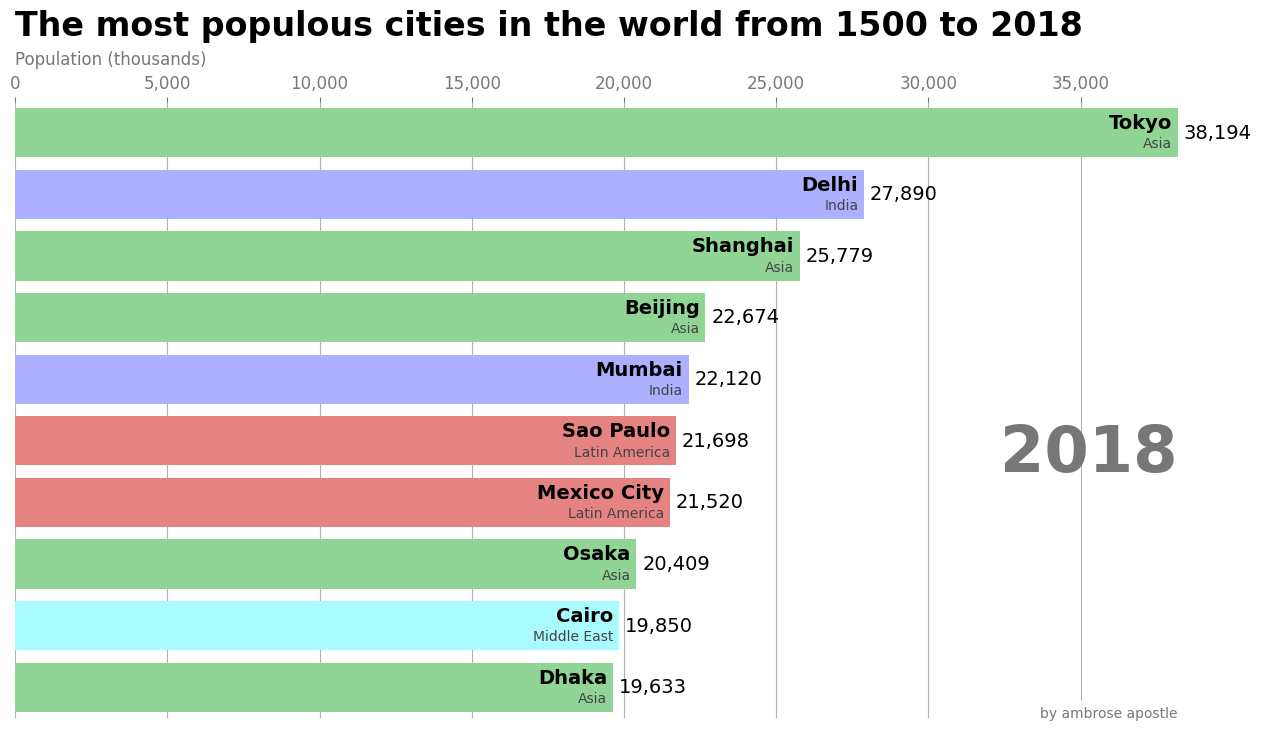

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(current_year):
    dff = df[df['year'].eq(current_year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
    dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, current_year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Population (thousands)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, 'The most populous cities in the world from 1900 to 2018',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    ax.text(1, 0, 'by ambrose apostle', transform=ax.transAxes, color='#777777', ha='right',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)

draw_barchart(2018)

## Animate

To animate, we will use [`FuncAnimation`][FuncAnimation] from `matplotlib.animation`.

[`FuncAnimation`][FuncAnimation] makes an animation by repeatedly calling a function (that draws on canvas).
In our case, it'll be `draw_barchart`.

`frames` arguments accepts on what values you want to run `draw_barchart` -- we'll
run from `year` 1900 to 2018.

Run below cell.

[FuncAnimation]: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.animation.FuncAnimation.html

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1900, 2019))
HTML(animator.to_jshtml())
# or use animator.to_html5_video() or animator.save()

### xkcd-style

Turning your matplotlib plots into xkcd styled ones is pretty easy.
You can simply turn on `xkcd` sketch-style drawing mode with `plt.xkcd`.

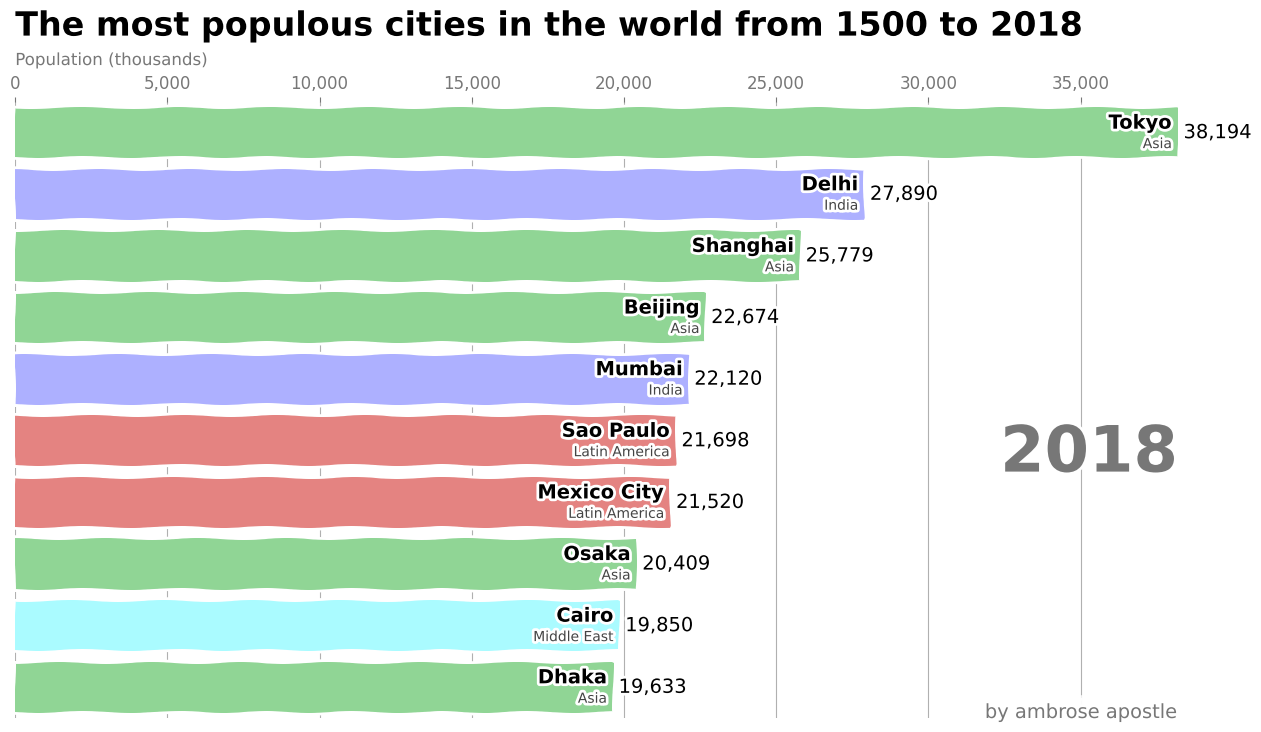

In [ ]:
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(15, 8))
    draw_barchart(2018)

# Step by step: Details

We'll now go over the ouput from sratch.

### Data transformations

We are interested to see top `value`s are a given `year`.
Using pandas transformations, we will get top `10` values.

In [ ]:
current_year = 2018
dff = df[df['year'].eq(current_year)].sort_values(by='value', ascending=False).head(10)
dff

,name,group,year,value
6045,Tokyo,Asia,2018,38194.2
1324,Delhi,India,2018,27890.0
5547,Shanghai,Asia,2018,25778.6
689,Beijing,Asia,2018,22674.2
3748,Mumbai,India,2018,22120.0
5445,Sao Paulo,Latin America,2018,21697.8
3574,Mexico City,Latin America,2018,21520.4
4679,Osaka,Asia,2018,20409.0
1195,Cairo,Middle East,2018,19849.6
1336,Dhaka,Asia,2018,19632.6


### Basic chart

Now, let's plot a basic bar chart. We start by creating a figure and an axes.
Then, we use `ax.barh(x, y)` to draw horizontal barchart.


<BarContainer object of 10 artists>

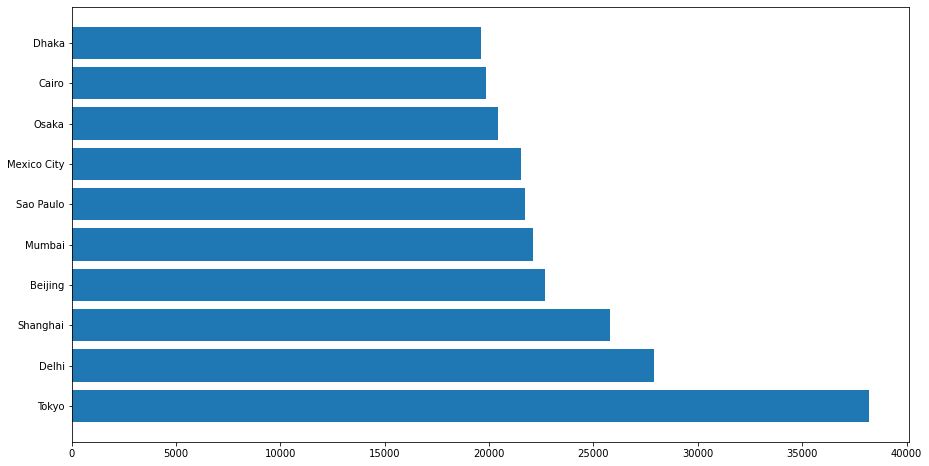

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['name'], dff['value'])

### Color, Labels

Next, let's add group labels and colors based on groups.
We'll user `colors` and `group_lk` to add color to the bars.

Text(1, 0.4, '2018')

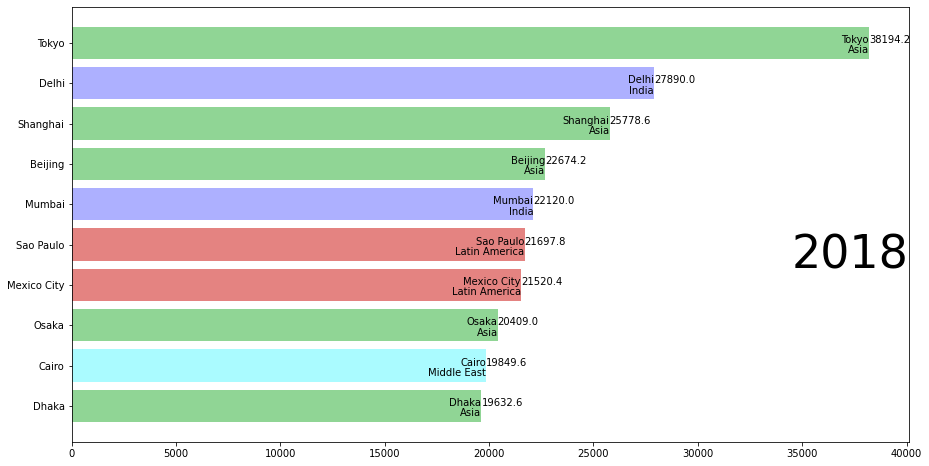

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]
ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
    ax.text(value, i,     name,            ha='right')
    ax.text(value, i-.25, group_lk[name],  ha='right')
    ax.text(value, i,     value, ha='left')
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')

### Polish Style

For convenience let's move our code to `draw_barchart` function.

We need to style following items:

- Text: font sizes, color, orientation
- Format: comma separated values and axes tickers
- Axis: Move to top, color, add subtitle
- Grid: Add lines behind bars
- Remove box frame
- Add title, credit

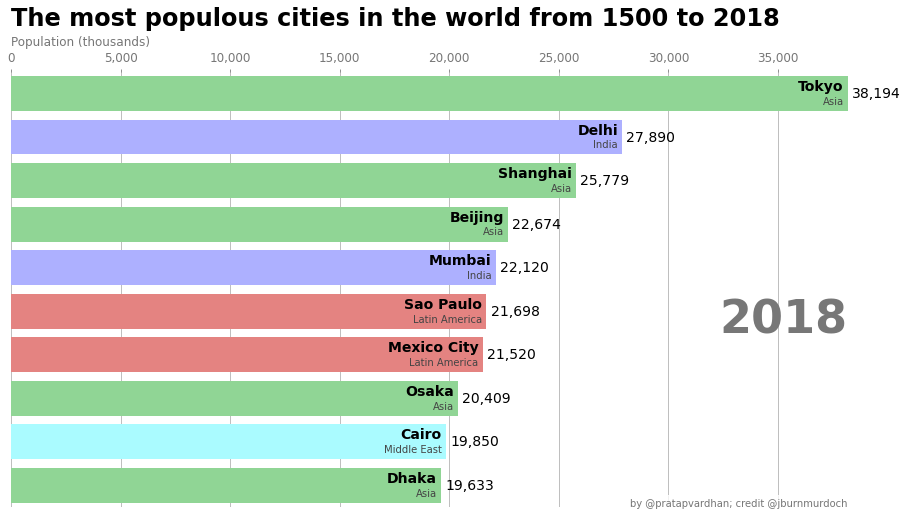

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
draw_barchart(2018)

Matplotlib is a massive library, being able to adjust every aspect of a plot is powerful
but it can be complex / time-consuming for highly customized charts.
Atleast, for these bar chart races, it was fairly quick!

In [ ]:
import bar_chart_race as bcr
df = bcr.load_dataset('covid19_tutorial')
bcr.bar_chart_race(
    df=df,
    filename='covid19_horiz.mp4',
    orientation='h',
    sort='desc',
    n_bars=6,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=10,
    interpolate_period=False,
    label_bars=True,
    bar_size=.95,
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
    period_fmt='%B %d, %Y',
    period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Total deaths: {v.nlargest(6).sum():,.0f}',
                                      'ha': 'right', 'size': 8, 'family': 'Courier New'},
    perpendicular_bar_func='median',
    period_length=500,
    figsize=(5, 3),
    dpi=144,
    cmap='dark12',
    title='COVID-19 Deaths by Country',
    title_size='',
    bar_label_size=7,
    tick_label_size=7,
    shared_fontdict={'family' : 'Helvetica', 'color' : '.1'},
    scale='linear',
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .7},
    filter_column_colors=False)


ModuleNotFoundError: ignored

In [ ]:
pip install bar-chart-race